In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from xclib.data import data_utils
import numpy as np
import time
import pickle
from sklearn.ensemble import RandomForestClassifier


In [2]:
#Change this later. Make the path as command line argument
X_train = data_utils.read_sparse_file('ass3_parta_data/train_x.txt', force_header=True)
train_class = np.genfromtxt('ass3_parta_data/train_y.txt').reshape(-1, 1)

X_valid = data_utils.read_sparse_file('ass3_parta_data/valid_x.txt', force_header=True)
valid_class = np.genfromtxt('ass3_parta_data/valid_y.txt').reshape(-1, 1)

X_test = data_utils.read_sparse_file('ass3_parta_data/test_x.txt', force_header=True)
test_class = np.genfromtxt('ass3_parta_data/test_y.txt').reshape(-1, 1)

/home/ayushi/.local/lib/python3.6/site-packages/xclib-0.96-py3.6-linux-x86_64.egg/xclib/data/data_utils.py:173: UserWarning: Header mis-match from inferred shape!
  warnings.warn("Header mis-match from inferred shape!")


In [3]:
f = open('ass3_parta_data/train_x.txt') 
m,n = f.readlines()[0].rstrip("\n").split(" ")
m,n = int(m),int(n)
f.close()

In [4]:
classes = np.unique(train_class)
pos_class_ind = np.where(train_class == 1)
neg_class_ind = np.where(train_class == 0)

In [5]:
attributes = np.array(range(X_train.A.shape[1]))

In [6]:
attributes.shape

(482,)

## Experiment with c) min_samples_split (2 to 10 in range of 2)

In [72]:
ne_rf = []
n_estimator = [x for x in range(50, 451, 100)]
ne_train_acc = []
ne_val_acc = []
ne_test_acc = []

for n_esti in n_estimator:
    ne_rf.append(RandomForestClassifier(n_estimators=n_esti, criterion="entropy", n_jobs=6))

In [73]:
for i in range(len(ne_rf)):
    ne_rf[i].fit(X_train.A, train_class.ravel())
    ne_train_acc.append(ne_rf[i].score(X_train.A, train_class.ravel()))
    ne_val_acc.append(ne_rf[i].score(X_valid.A, valid_class.ravel()))
    ne_test_acc.append(ne_rf[i].score(X_test.A, test_class.ravel()))

In [74]:
ne_train_acc = [x*100 for x in ne_train_acc]
ne_val_acc = [x*100 for x in ne_val_acc]
ne_test_acc = [x*100 for x in ne_test_acc]

#### Max_depth = Full Trees

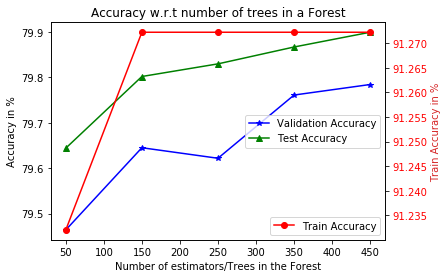

In [94]:
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.plot(n_estimator, ne_val_acc, marker="*", c='b', label="Validation Accuracy")
ax1.plot(n_estimator, ne_test_acc, marker='^', c='g',label="Test Accuracy")
ax1.set_xlabel("Number of estimators/Trees in the Forest")
ax1.set_ylabel("Accuracy in %")
plt.legend(loc=7)

color = 'tab:red'
ax2 = ax1.twinx()
ax2.set_ylabel("Train Accuracy in %", color=color)
ax2.plot(n_estimator, ne_train_acc, marker='o', c='r',label="Train Accuracy")
ax2.tick_params(axis='y', labelcolor='red')
plt.title("Accuracy w.r.t number of trees in a Forest")
plt.legend()
plt.savefig("plots/n-estimators-full-depth.png", dpi = 1000, bbox_inches='tight')
#plt.show()

#### Max_depth = 14

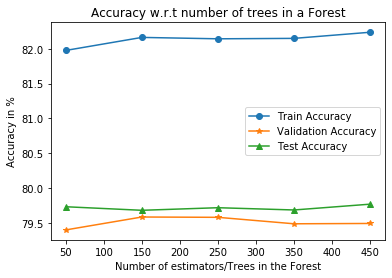

In [71]:
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(n_estimator, ne_train_acc, marker='o', label="Train Accuracy")
ax.plot(n_estimator, ne_val_acc, marker="*", label="Validation Accuracy")
ax.plot(n_estimator, ne_test_acc, marker='^', label="Test Accuracy")

ax.set_xlabel("Number of estimators/Trees in the Forest")
ax.set_ylabel("Accuracy in %")
ax.set_title("Accuracy w.r.t number of trees in a Forest")
#ax.set_ylim(bottom=0.79)
plt.legend()
plt.savefig("plots/n-estimators-depth-14.png", dpi = 1000, bbox_inches='tight')
#plt.show()

## Experiment with b) max_features (0.1 to 1.0 in range of 0.2)
If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.

In [106]:
mf_rf = []
max_fea = [np.round(x,2) for x in np.arange(0.1, 1.0, 0.2)]
mf_train_acc = []
mf_val_acc = []
mf_test_acc = []

for mf in max_fea:
    mf_rf.append(RandomForestClassifier(n_estimators=450, max_features=mf, criterion="entropy", n_jobs=6))

In [ ]:
for i in range(len(mf_rf)):
    mf_rf[i].fit(X_train.A, train_class.ravel())
    mf_train_acc.append(mf_rf[i].score(X_train.A, train_class.ravel()))
    mf_val_acc.append(mf_rf[i].score(X_valid.A, valid_class.ravel()))
    mf_test_acc.append(mf_rf[i].score(X_test.A, test_class.ravel()))

In [74]:
mf_train_acc = [x*100 for x in mf_train_acc]
mf_val_acc = [x*100 for x in mf_val_acc]
mf_test_acc = [x*100 for x in mf_test_acc]

#### Max_features exploration Graph with entropy and 450 number of estimators. 

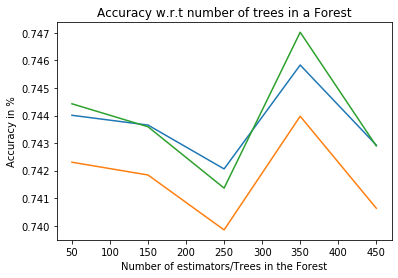

In [45]:
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.plot(n_estimator, mf_val_acc, marker="*", c='b', label="Validation Accuracy")
ax1.plot(n_estimator, mf_test_acc, marker='^', c='g',label="Test Accuracy")
ax1.set_xlabel("Max-features ")
ax1.set_ylabel("Accuracy in %")
plt.legend(loc=7)

color = 'tab:red'
ax2 = ax1.twinx()
ax2.set_ylabel("Train Accuracy in %", color=color)
ax2.plot(n_estimator, mf_train_acc, marker='o', c='r',label="Train Accuracy")
ax2.tick_params(axis='y', labelcolor='red')
plt.title("Accuracy w.r.t number of trees in a Forest")
plt.legend()
plt.savefig("plots/n-estimators-full-depth.png", dpi = 1000, bbox_inches='tight')
#plt.show()